In [2]:
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
fd = genfromtxt('fW.csv', delimiter='\t')
x = []
y = []
for i in range(len(fd)):
    x.append(fd[i][0])
    y.append(fd[i][1])
# only fit data in certain range
x1,y1,x2,y2 = [],[],[],[]
isLess12 = list(map(lambda i:i< 11.5, x))
for i in range(len(x)):
    if isLess12[i]:
        x1.append(x[i])
        y1.append(y[i])
    else:
        x2.append(x[i])
        y2.append(y[i])

# 3rd-order polynomial fitting
z1 = np.polyfit(x1, y1, 3)
p1 = np.poly1d(z1)

xp1 = np.linspace(0, 11.5, 1000)
maxpH = 0
for i in range(len(xp1)):
    if p1(xp1[i]) >= p1(maxpH):
        maxpH = xp1[i]
maxAn = p1(maxpH)
print(maxpH, maxAn)
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
xp2 = np.linspace(11.5, 13, 10)

_ = plt.plot(xp1, p1(xp1), '-', xp2, p2(xp2), '--')
plt.scatter(x,y)
plt.xlabel('pH_value')
plt.ylabel('contact angle')
plt.savefig("fW_2.png")

NameError: name 'np' is not defined

In [3]:
import csv
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
fd = genfromtxt('pt.csv', delimiter='\t')
x = [] # pH
y = [] # contact angle
for i in range(len(fd)):
    x.append(fd[i][0])
    y.append(fd[i][1])
r = 0.07199 # N/m
maxAngle = 64.61
d = 0.9*10**(-9) # debye length in 0.1M KCl
k = 1.38 *10**(-23) # J/K
T = 298 # Kelvin
e0 = 8.85 * 10**(-12) # F/m
er = 80
e = 1.6*10**(-19) # C
z = 1 # valency
a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand

x = np.array(x)
print(x-maxAngle)
print(np.cos((x - maxAngle)* np.pi / 180.))
print(1+r*np.cos(x - maxAngle)/a)
    

[-52.73 -53.05 -53.2  -52.33 -53.88 -57.61 -55.81 -52.67 -63.49 -61.73
 -63.96 -53.8  -62.69]
[0.60557181 0.60111785 0.5990236  0.61111267 0.58947836 0.53567942
 0.56193902 0.60640483 0.446354   0.47362713 0.43899852 0.59060567
 0.45880464]
[-25.99204929 -31.44701003 -32.89160114 -15.41205187 -29.83029792
  17.89008685  26.60532539 -24.64242956  28.39787741  16.65147244
  15.83386344 -30.9922961   35.28360357]


6.493493493493493 65.89115288391872


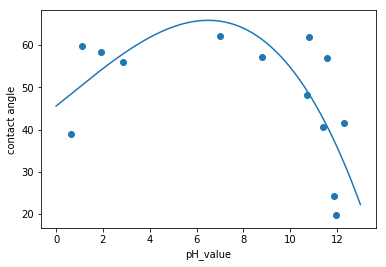

In [4]:
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
fd = genfromtxt('pt.csv', delimiter='\t')
x = []
y = []
for i in range(len(fd)):
    x.append(fd[i][0])
    y.append(fd[i][1])
# only fit data in certain range
x1,y1 = [],[]

for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])

# 3rd-order polynomial fitting
z1 = np.polyfit(x1, y1, 3)
p1 = np.poly1d(z1)

xp1 = np.linspace(0, 13, 1000)
maxpH = 0
for i in range(len(xp1)):
    if p1(xp1[i]) >= p1(maxpH):
        maxpH = xp1[i]
maxAn = p1(maxpH)
print(maxpH, maxAn)

_ = plt.plot(xp1, p1(xp1), '-')
plt.scatter(x,y)
plt.xlabel('pH_value')
plt.ylabel('contact angle')
plt.savefig("pt_1.png")

[-43.84 -18.94  -8.44 -17.74 -10.54 -42.34  -0.74 -19.24  -5.34  -4.84
 -12.24  -9.34  -5.24]


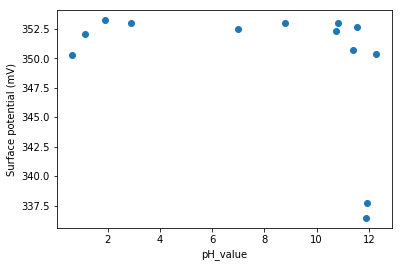

In [5]:
import csv
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
fd = genfromtxt('mW.csv', delimiter='\t')
x = [] # pH
y = [] # contact angle
for i in range(len(fd)):
    x.append(fd[i][0])
    y.append(fd[i][1])
r = 0.07199 # N/m
maxAngle = 79.84
d = 0.9*10**(-9) # debye length in 0.1M KCl
k = 1.38 *10**(-23) # J/K
T = 298 # Kelvin
e0 = 8.85 * 10**(-12) # F/m
er = 80
e = 1.6*10**(-19) # C
z = 1 # valency
a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand

y = np.array(y)
print(y-maxAngle)
left = np.cos((y - maxAngle)* np.pi / 180.)
right = np.arccosh(left/a + 1) # second term + 1
fi = right*2*k*T/(z*e) # surface potential
plt.scatter(x, fi*1000)
plt.xlabel('pH_value')
plt.ylabel('Surface potential (mV)')
plt.savefig("mW_1_potential.png")

0.002078746232999998
[15.26816064 19.68580179 19.32673486 17.27340322 19.6953093  12.40392104
 18.01242546  0.          9.72058539 17.79976351 14.56748301 17.57725976
  3.11907139]


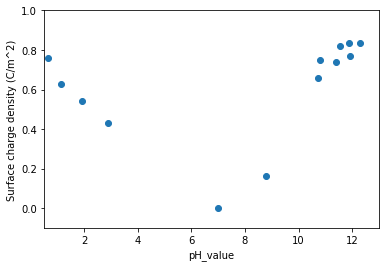

In [14]:
def pH_charge(name, region, maxAngle):
    import csv
    from numpy import genfromtxt
    import numpy as np
    import matplotlib.pyplot as plt
    fd = genfromtxt('{sample}.csv'.format(sample = name), delimiter='\t')
    x = [] # pH
    y = [] # contact angle
    for i in range(len(fd)):
        x.append(fd[i][0])
        y.append(fd[i][1])
    r = 0.07199 # N/m
    d = 0.9*10**(-9) # debye length in 0.1M KCl
    k = 1.38 *10**(-23) # J/K
    T = 298 # Kelvin
    e0 = 8.85 * 10**(-12) # F/m
    er = 80
    e = 1.6*10**(-19) # C
    z = 1 # valency
    a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand
    print(a)
    y = np.array(y)
    left = np.cos(y * np.pi / 180.)-np.cos(maxAngle* np.pi / 180.)
    for i in range(len(left)):
        if left[i] <= 0:
            left[i] = 0
    print(r*left/a)
    right = np.arccosh(r*left/a+1) # second term + 1
    fi = right*2*k*T/(z*e) # surface potential
    sigma = 2*k*T*e0*er*np.sinh(z*e*fi/(2*k*T))/(z*e*d)
    plt.scatter(x, sigma)
    plt.xlim(0.5,13)
    plt.ylim(-0.1, 1)
    plt.xlabel('pH_value')
    plt.ylabel('Surface charge density (C/m^2)')
    plt.savefig("{sample}_{method}_charge.png".format(sample = name, method = region))
#pH_charge('pt', 1, 65.89)
#pH_charge('pt', 2, 64.61)
pH_charge('fW', 1, 65.23)
#pH_charge('fW', 2, 66.40)
#pH_charge('mW', 1, 79.84)
#pH_charge('mW', 2, 78.66)

0.002078746232999998
[ 0.44087556  0.56843709  0.55806886  0.49877791  0.56871163  0.35816925
  0.52011754 -0.01862768  0.28068663  0.51397682  0.42064315  0.50755192
  0.0900647 ]
[0.44087556 0.56843709 0.55806886 0.49877791 0.56871163 0.35816925
 0.52011754 0.         0.28068663 0.51397682 0.42064315 0.50755192
 0.0900647 ]
[15.26816064 19.68580179 19.32673486 17.27340322 19.6953093  12.40392104
 18.01242546  0.          9.72058539 17.79976351 14.56748301 17.57725976
  3.11907139]


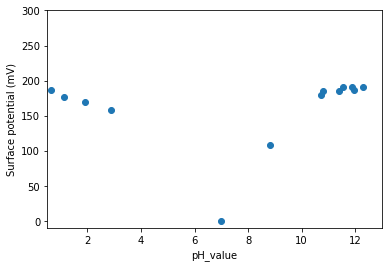

In [12]:
def pH_potential(name, region, maxAngle):
    import csv
    from numpy import genfromtxt
    import numpy as np
    import matplotlib.pyplot as plt
    fd = genfromtxt('{sample}.csv'.format(sample = name), delimiter='\t')
    x = [] # pH
    y = [] # contact angle
    for i in range(len(fd)):
        x.append(fd[i][0])
        y.append(fd[i][1])
    r = 0.07199 # N/m
    d = 0.9*10**(-9) # debye length in 0.1M KCl
    k = 1.38 *10**(-23) # J/K
    T = 298 # Kelvin
    e0 = 8.85 * 10**(-12) # F/m
    er = 80
    e = 1.6*10**(-19) # C
    z = 1 # valency
    a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand
    print(a)
    y = np.array(y)
    left = np.cos(y * np.pi / 180.)-np.cos(maxAngle* np.pi / 180.)
    print(left)
    for i in range(len(left)):
        if left[i] <= 0:
            left[i] = 0
    print(r*left/a)
    right = np.arccosh(r*left/a+1) # second term + 1
    fi = right*2*k*T/(z*e) # surface potential
    #sigma = 2*k*T*e0*er*np.sinh(z*e*fi/(2*k*T))/(z*e*d)
    plt.scatter(x, fi*1000)
    plt.xlim(0.5,13)
    plt.ylim(-10, 300)
    plt.xlabel('pH_value')
    plt.ylabel('Surface potential (mV)')
    plt.savefig("{sample}_{method}_potential.png".format(sample = name, method = region))
#pH_potential('pt', 1, 65.89)
#pH_potential('pt', 2, 64.61)
pH_potential('fW', 1, 65.23)
#pH_potential('fW', 2, 66.40)
#pH_potential('mW', 1, 79.84)
#pH_potential('mW', 2, 78.66)